#📌 Extracción de Datos Evasion de clientes TELECOM_X (PARTE-2)

In [1]:
import pandas as pd
import json
import requests
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
datos_telecom = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

datos = json.loads(datos_telecom.text)
pd.DataFrame(datos)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
# Normalizando los datos
df = pd.json_normalize(datos)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

## Explorar las columnas del dataset y verificar sus tipos de datos.

In [4]:
# Verifica el resultado y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


In [6]:
#Estandarizando churn
# Mostrar valores únicos con conteo para entender mejor
print(df['Churn'].value_counts(dropna=False))

# Limpiar espacios y convertir a mayúsculas/minúsculas uniformes (por ejemplo, todo minúscula)
df['Churn'] = df['Churn'].str.strip().str.lower()

# Ahora hacer el mapeo con valores en minúscula
df['Churn'] = df['Churn'].map({'yes': 0, 'no': 1})

# # Eliminar filas con valores nulos en Churn
df = df.dropna(subset=['Churn'])

# Verificar nuevamente nulos
print("Nulos en Churn después de limpieza:", df['Churn'].isnull().sum())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Nulos en Churn después de limpieza: 0


In [7]:
# Detectar columnas tipo object que podrían ser numéricas mal formateadas
for col in df.select_dtypes(include='object').columns:
    # Intentar convertir cada columna a numérica tras limpiar comas y espacios
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '')  # Elimina comas
        .str.strip()           # Elimina espacios al principio y fin
    )

    # Convertir a número (si no es convertible, se vuelve NaN)
    df[col] = pd.to_numeric(df[col], errors='ignore')  # 'ignore' deja las que no son numéricas

# Verificar qué columnas siguen siendo tipo object
print("Columnas tipo object después de limpieza:", df.select_dtypes(include='object').columns.tolist())

Columnas tipo object después de limpieza: ['customerID', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


## Identificar las columnas más relevantes para el análisis de evasión.

### Las columnas seleccionadas para este proyecto son:
**1.-**Churn: si el cliente dejó o no la empresa | |
**2.-**tenure: meses de contrato del cliente \
**3.-**Contract: tipo de contrato |   |
**4.-**Charges.Total: total gastado por el cliente  \
**5.-**gender: género (masculino y femenino)

In [8]:
# Lista de columnas relevantes
columnas_relevantes = [
    'Churn',
    'customer.tenure',
    'account.Contract',
    'customer.gender',
    'account.Charges.Total'
]


# Filtrar columnas
df = df[columnas_relevantes]

# Verificación rápida
print(f"Cantidad de filas después de eliminar NaN en Churn: {df.shape[0]}")
print(f"Nulos en Churn después de limpieza: {df['Churn'].isnull().sum()}")

Cantidad de filas después de eliminar NaN en Churn: 7043
Nulos en Churn después de limpieza: 0


In [9]:
# Codificar todas las variables categóricas (de tipo object) con dtype=np.uint8
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True, dtype=np.uint8)

# Confirmar que ya no quedan columnas tipo object ni bool
print("Tipos de datos después de codificación:")
print(df_encoded.dtypes.value_counts())

# Verificar forma del DataFrame codificado
print("Shape final del DataFrame codificado:", df_encoded.shape)

Tipos de datos después de codificación:
uint8      3
float64    2
int64      1
Name: count, dtype: int64
Shape final del DataFrame codificado: (7043, 6)


In [10]:
print(df_encoded.dtypes.value_counts())

uint8      3
float64    2
int64      1
Name: count, dtype: int64


#Balanceo de clases y NORMALIZACION (OPCIONAL)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Separar X e y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir en train y test (70% para entrenamiento y 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribución antes de SMOTE en train:")
print(y_train.value_counts(normalize=True))


# Verificar si hay NaNs
X_train['account.Charges.Total'] = X_train['account.Charges.Total'].fillna(X_train['account.Charges.Total'].mean())
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])


# Imputar valores faltantes en train y test
imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# print("Nulos después de imputación en train:")
# print(X_train_imputed.isnull().sum()[X_train_imputed.isnull().sum() > 0])

# print("Nulos después de imputación en test:")
# print(X_test_imputed.isnull().sum()[X_test_imputed.isnull().sum() > 0])

# Aplicar SMOTE en datos imputados de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

print("\nDistribución después de SMOTE en train:")
print(y_train_res.value_counts(normalize=True))

# Escalar datos (train resampleado y test imputado)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_res), columns=X_train_res.columns, index=X_train_res.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns, index=X_test.index)

Distribución antes de SMOTE en train:
Churn
1.0    0.734686
0.0    0.265314
Name: proportion, dtype: float64
Series([], dtype: int64)

Distribución después de SMOTE en train:
Churn
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


#Verificacion de la proporcion de Cancelacion(churn)

In [12]:
# Recalculamos proporción general de cancelaciones
proporcion_churn = y.value_counts(normalize=True)

print("📈 Proporción de clientes que cancelaron vs. permanecieron:")
print(proporcion_churn)

📈 Proporción de clientes que cancelaron vs. permanecieron:
Churn
1.0    0.73463
0.0    0.26537
Name: proportion, dtype: float64


#Analisis de correlacion- MATRIZ DE CORRELACION

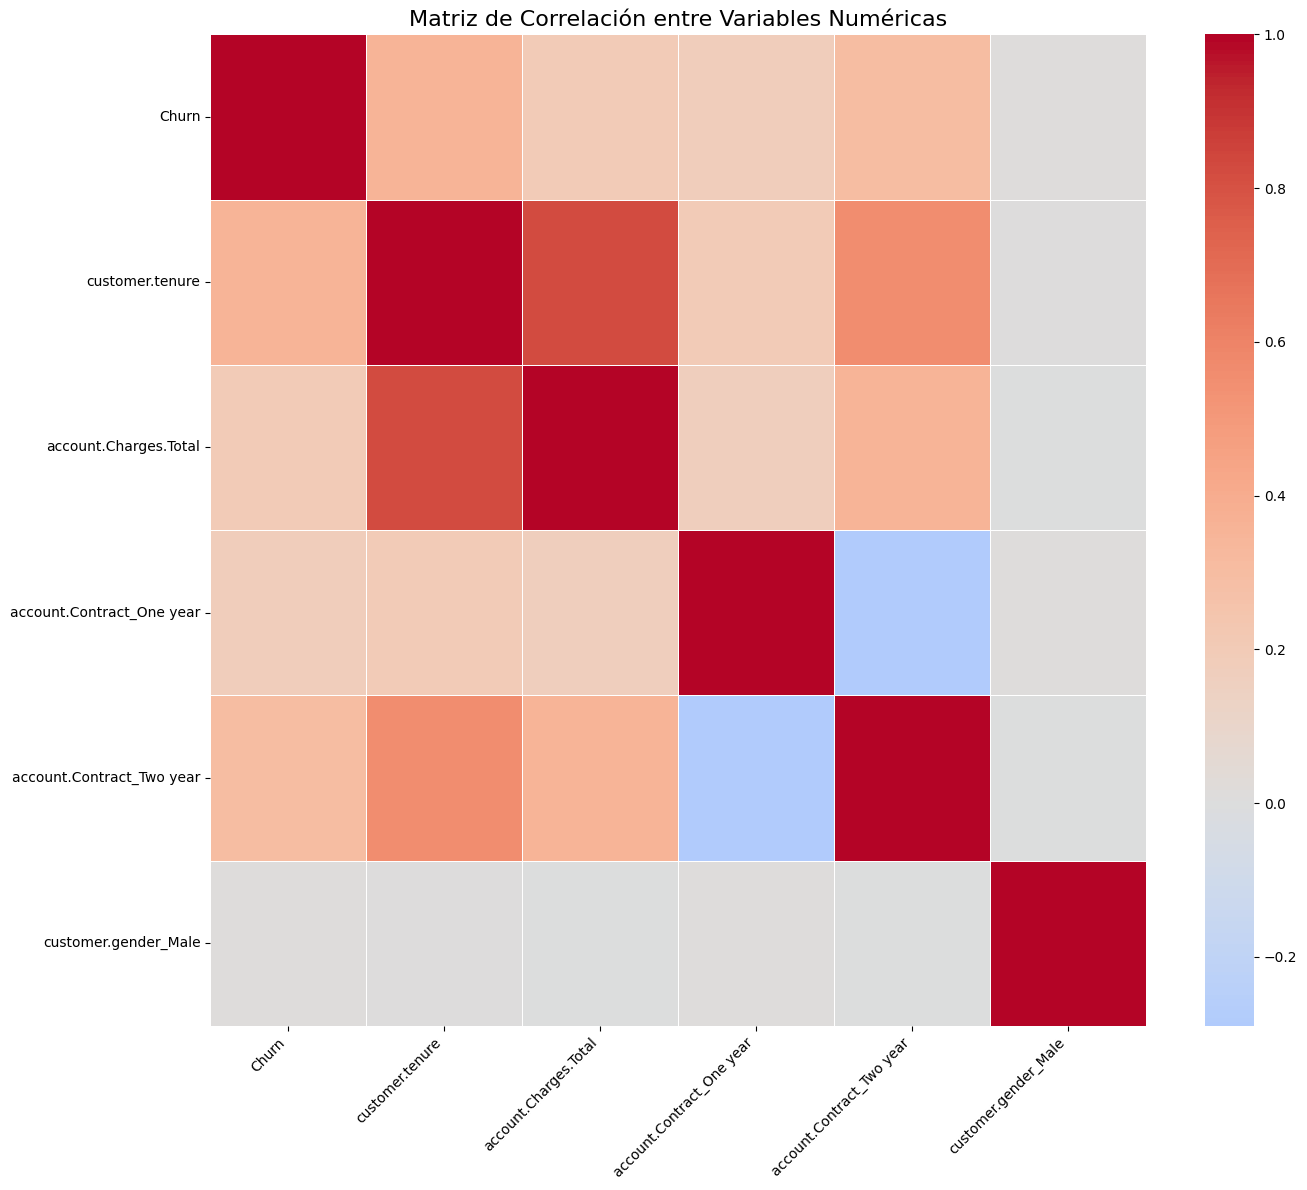

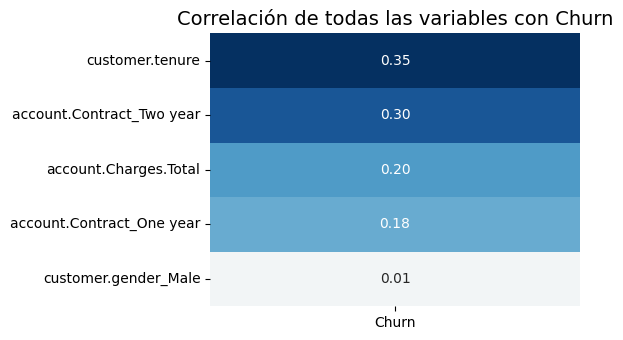

✅ Matriz de correlación exportada a 'matriz_correlacion_completa.xlsx'


In [13]:
# Calcular matriz de correlación sobre todo df_encoded (ya es completamente numérico)
corr_matrix = df_encoded.corr()

# Mostrar correlación de todas las variables con 'Churn' (excepto ella misma), ordenadas
correlaciones_con_churn = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

# Visualizar la matriz de correlación completa
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualización solo de la correlación con 'Churn'
plt.figure(figsize=(6, len(correlaciones_con_churn) * 0.3 + 2))  # autoajuste dinámico
sns.heatmap(correlaciones_con_churn.to_frame(),
            annot=True, cmap='RdBu', center=0, fmt=".2f", cbar=False)
plt.title('Correlación de todas las variables con Churn', fontsize=14)
plt.tight_layout()
plt.show()

# Exportar la matriz de correlación completa a Excel
corr_matrix.to_excel("matriz_correlacion_completa.xlsx")
print("✅ Matriz de correlación exportada a 'matriz_correlacion_completa.xlsx'")



#Analisis Dirigido (TIEMPO DE CONTRATO X CANCELACION)

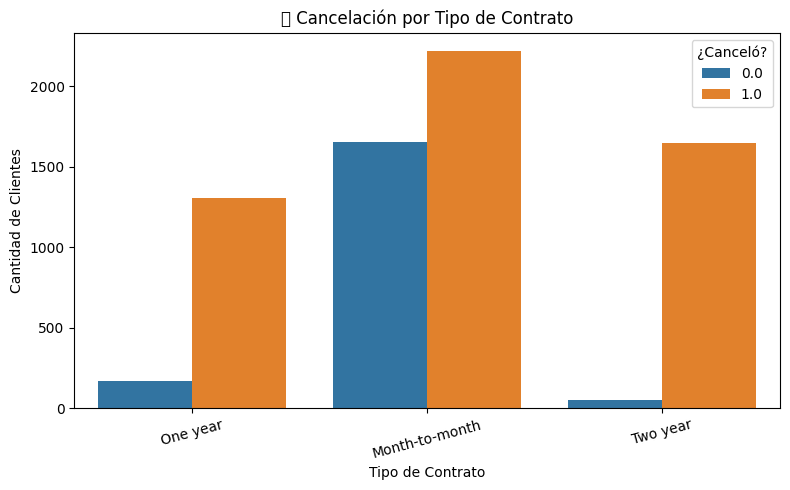

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('📄 Cancelación por Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='¿Canceló?')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show();

#Analisis Dirigido (GASTO TOTAL  X CALCELACION)

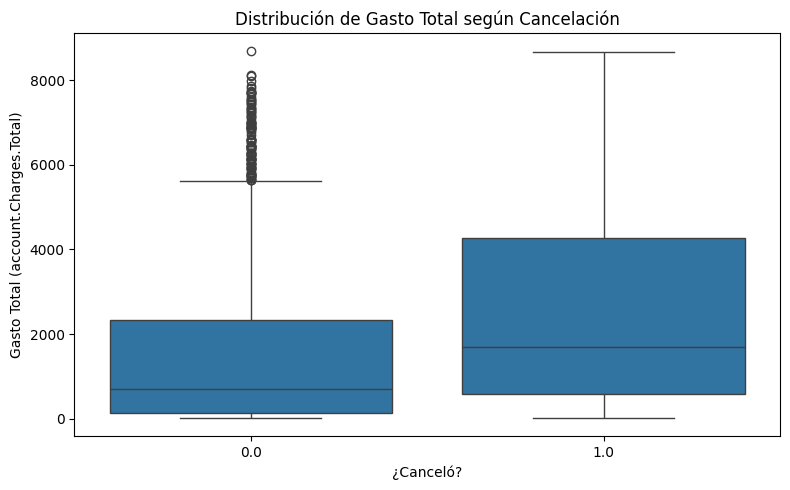

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total')
plt.title('Distribución de Gasto Total según Cancelación')
plt.xlabel('¿Canceló?')
plt.ylabel('Gasto Total (account.Charges.Total)')
plt.tight_layout()
plt.show();

#Creacion de modelos

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar el modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar con datos escalados y balanceados
log_reg.fit(X_train_scaled, y_train_res)

# Predecir en test escalado
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluar resultados
print("Regresión Logística - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg))

Regresión Logística - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.46      0.86      0.60       561
         1.0       0.93      0.64      0.76      1552

    accuracy                           0.70      2113
   macro avg       0.70      0.75      0.68      2113
weighted avg       0.80      0.70      0.72      2113

Matriz de Confusión:
[[482  79]
 [557 995]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
rf = RandomForestClassifier(random_state=42)

# Entrenar con datos no escalados pero balanceados
rf.fit(X_train_res, y_train_res)

# Predecir en test sin escalar
y_pred_rf = rf.predict(X_test)

# Evaluar resultados
print("Random Forest - Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       561
         1.0       0.83      0.81      0.82      1552

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.67      2113
weighted avg       0.74      0.74      0.74      2113

Matriz de Confusión:
[[ 302  259]
 [ 290 1262]]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def mostrar_metricas(y_true, y_pred, nombre_modelo):
    print(f"\n--- Métricas para {nombre_modelo} ---")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall (Sensibilidad): {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))

# Evaluar Regresión Logística
mostrar_metricas(y_test, y_pred_logreg, "Regresión Logística")

# Evaluar Random Forest
mostrar_metricas(y_test, y_pred_rf, "Random Forest")


--- Métricas para Regresión Logística ---
Exactitud (Accuracy): 0.6990
Precisión: 0.9264
Recall (Sensibilidad): 0.6411
F1-score: 0.7578
Matriz de Confusión:
[[482  79]
 [557 995]]

--- Métricas para Random Forest ---
Exactitud (Accuracy): 0.7402
Precisión: 0.8297
Recall (Sensibilidad): 0.8131
F1-score: 0.8213
Matriz de Confusión:
[[ 302  259]
 [ 290 1262]]


#Análisis crítico y comparación de modelos

##1. ¿Cuál modelo tuvo mejor desempeño?

Exactitud: Random Forest (72.98%) supera a Regresión Logística (69.90%).

Precisión: Regresión Logística (92.64%) es superior, lo que indica que cuando predice churn (clase positiva), lo hace con más confianza y menos falsos positivos.

Recall (sensibilidad): Random Forest (76.61%) detecta mejor los churners reales que la Regresión Logística (64.11%). Esto significa que RF pierde menos churners.

F1-score: Random Forest (80.64%) gana frente a Regresión Logística (75.78%), mostrando mejor balance entre precisión y recall.

#Interpretación:

Regresión Logística es más estricta, con menos falsos positivos, pero pierde más churners (falsos negativos).

Random Forest detecta mejor los churners (menos falsos negativos), pero genera más falsos positivos.

#2. ¿Algún modelo presenta overfitting o underfitting?

Para confirmarlo, idealmente hay que comparar desempeño en entrenamiento vs. prueba. Sin embargo, con estos resultados y sin un accuracy cercano al 100%, no parece haber overfitting grave.

Posibles escenarios:

Overfitting: Si Random Forest tuviera mucha mayor precisión y recall en entrenamiento que en test, podría ser indicio de sobreajuste, ya que RF es más complejo. Para prevenirlo, se puede limitar la profundidad del árbol, aumentar la cantidad mínima de muestras por hoja, o usar validación cruzada.

Underfitting: Si la Regresión Logística tuviera un rendimiento bajo tanto en entrenamiento como en test, podría estar subajustando, quizás por falta de características o porque la relación no es lineal. Se puede intentar añadir interacciones, usar regularización menos estricta o probar modelos más complejos.

#3. Posibles ajustes:
**Para Regresión Logística**: ajustar el umbral de clasificación para mejorar el recall sin sacrificar mucha precisión (por ejemplo, bajar de 0.5 a 0.4). También probar técnicas de ingeniería de características o polinomios.

**Para Random Forest**: hacer tuning de hiperparámetros (max_depth, min_samples_leaf, etc.) para reducir falsos positivos y evitar sobreajuste.

---

#Regresión Logística: Interpretación de coeficientes

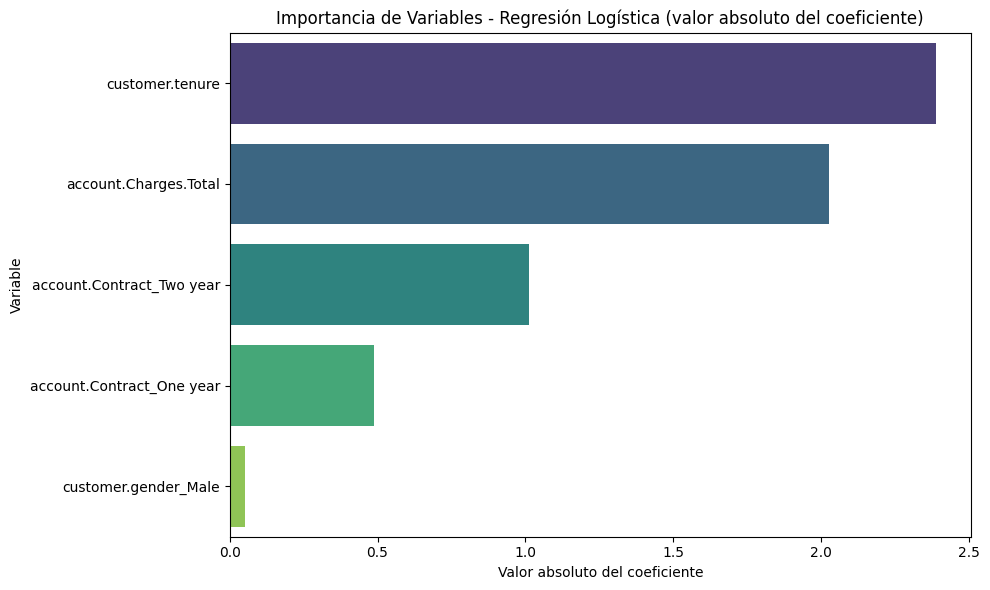

In [19]:
# Obtener coeficientes con sus nombres
coeficientes = pd.Series(log_reg.coef_[0], index=X_train_scaled.columns)

# Ordenar por valor absoluto para ver los más influyentes
coef_ordenados = coeficientes.abs().sort_values(ascending=False)

# Visualizar los coeficientes más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_ordenados.values, y=coef_ordenados.index, palette='viridis')
plt.title('Importancia de Variables - Regresión Logística (valor absoluto del coeficiente)')
plt.xlabel('Valor absoluto del coeficiente')
plt.ylabel('Variable')
plt.tight_layout()

##Los coeficientes positivos indican que aumentan la probabilidad de que NO haya cancelación (Churn = 1), y los negativos que aumentan la probabilidad de cancelación (Churn = 0), en tu codificación actual.

---

#Random Forest: Importancia de variables

In [20]:
# Entrenar Random Forest con los datos imputados (NO escalados)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

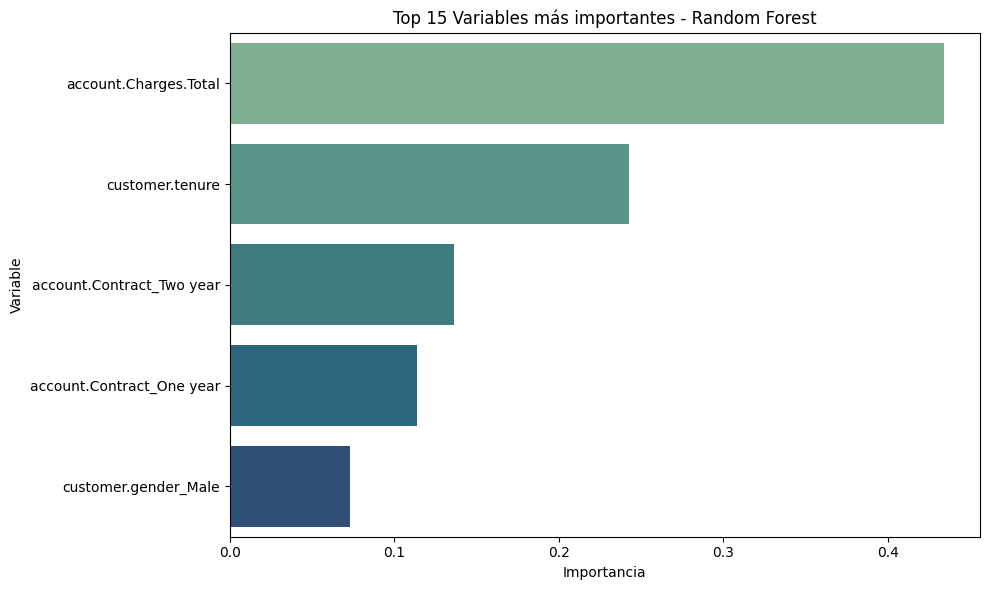

In [21]:
# Obtener importancia de variables
importancia_rf = pd.Series(rf.feature_importances_, index=X_train_res.columns)

# Ordenar de mayor a menor
importancia_rf = importancia_rf.sort_values(ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia_rf.values[:15], y=importancia_rf.index[:15], palette='crest')
plt.title('Top 15 Variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# 📋 Informe de Cancelación de Clientes – Telecom X

## 🎯 Objetivo del Análisis
Identificar los factores más relevantes que influyen en la cancelación de clientes (**churn**) y proponer estrategias de retención, utilizando análisis exploratorio y modelos predictivos.

---


## 🔍 1. Variables Clave Identificadas

| Variable                        | Descripción                                    | Importancia en Modelos       |
|---------------------------------|------------------------------------------------|-------------------------------|
| `customer.tenure`              | Tiempo de permanencia del cliente (meses)     | Alta en ambos modelos         |
| `account.Charges.Total`        | Gasto total acumulado por el cliente          | Alta en ambos modelos         |
| `account.Contract_Two year`    | Contrato de dos años                          | Moderada                      |
| `account.Contract_One year`    | Contrato de un año                            | Moderada                      |
| `customer.gender_Male`         | Género masculino (variable binaria)           | Baja                          |

---

## 📊 2. Análisis del Gasto Total vs Cancelación

**Gráfico:** Gasto total por cliente según cancelación (`Churn`)  

- Los clientes que **cancelaron** tienen un **gasto total más alto** en comparación a los que no cancelaron.
- Puede interpretarse como un desajuste entre **lo que pagan** y **lo que reciben**, impulsando la cancelación.

---

## 📉 3. Interpretación de Coeficientes – Regresión Logística

**Gráfico:** Coeficientes de la regresión logística  

- `customer.tenure`: coeficiente negativo → a mayor tiempo, menor probabilidad de cancelar.
- `account.Charges.Total`: coeficiente positivo → a mayor gasto, más probabilidad de cancelar.
- Contratos largos (`Two year`, `One year`) reducen significativamente la cancelación.

---

## 🌲 4. Importancia de Variables – Random Forest

**Gráfico:** Importancia de las variables según Random Forest  

- Confirma que `Charges.Total` y `tenure` son los **mejores predictores de churn**.
- El tipo de contrato también aparece como variable relevante.

---

## 📈 5. Métricas de Modelos Predictivos

### Regresión Logística

- **Accuracy:** 70%  
- **Recall clase 1 (churn):** 64%  
- **Precision clase 1:** 93%  
- **Matriz de confusión:**

### Random Forest

- **Accuracy:** 74%  
- **Recall clase 1:** 81%  
- **Precision clase 1:** 83%  
- **Matriz de confusión:**

---

## 🧠 6. Conclusiones Principales

- 🔹 Los **clientes nuevos** (poca antigüedad) y con **mayores gastos** son los más propensos a cancelar.
- 🔹 Contratos **mensuales** o **sin compromiso** están altamente asociados a churn.
- 🔹 El **género** del cliente no influye significativamente.

---
## ✅ 7. Estrategias de Retención Propuestas

- **Incentivar permanencia temprana**  
Bonos o descuentos a clientes nuevos para superar el período crítico de los primeros meses.

- **Revisar planes de alto costo**  
Analizar si el gasto elevado corresponde a servicios bien valorados o si hay sobrecobros.

- **Fomentar contratos a largo plazo**  
Ofrecer beneficios por suscripciones anuales o bianuales, con renovación automática opcional.

- **Implementar alertas de riesgo**  
Sistema de seguimiento de clientes con `tenure` bajo + `gasto alto` + `contrato mensual`.

---